# Base Loading

## Package

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

## Data
資料總共有7份，每一份皆有 train 和 test 檔案。
最後一欄是 y

In [2]:
train_data, test_data = {}, {}

In [3]:
for i in range(1, 8):
    train_data["data{}".format(i)] = pd.read_csv("./data/data{}/train.csv".format(i), header=None)
    test_data["data{}".format(i)]  = pd.read_csv("./data/data{}/test.csv".format(i), header=None)

In [4]:
for data in train_data:
    df = train_data[data]
    print(data, ':', df.shape)

data1 : (765, 9)
data2 : (574, 9)
data3 : (371, 14)
data4 : (6064, 9)
data5 : (7077, 5)
data6 : (1187, 12)
data7 : (231, 7)


In [5]:
# Data type of every columns in dataframe
for i in range(1, 8):
    print("\n** data", i)
    train_data["data{}".format(i)].info()


** data 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       531 non-null    float64
 1   1       545 non-null    float64
 2   2       547 non-null    float64
 3   3       540 non-null    float64
 4   4       546 non-null    float64
 5   5       526 non-null    float64
 6   6       516 non-null    float64
 7   7       528 non-null    float64
 8   8       765 non-null    float64
dtypes: float64(9)
memory usage: 53.9 KB

** data 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       407 non-null    float64
 1   1       413 non-null    float64
 2   2       379 non-null    float64
 3   3       395 non-null    float64
 4   4       423 non-null    float64
 5   5       411 non-null    float64
 6   6       407 non-null 

In [6]:
for data in train_data:
    df = train_data[data]
    unique_item = []
    for col in range(df.shape[1]):
        values = df.iloc[:, col].unique()
        values = sorted(values[~np.isnan(values)])
        if len(values) < 20:
            unique_item.append(values)
        else:
            unique_item.append('Continuous')
    display(pd.DataFrame({'unique num':df.nunique(), 
                          'feature type':df.dtypes,
                          'values':unique_item}))

,unique num,feature type,values
0,216,float64,Continuous
1,141,float64,Continuous
2,104,float64,Continuous
3,151,float64,Continuous
4,89,float64,Continuous
5,204,float64,Continuous
6,224,float64,Continuous
7,14,float64,"[1.0, 3.0, 7.0, 14.0, 28.0, 56.0, 90.0, 91.0, ..."
8,646,float64,Continuous


,unique num,feature type,values
0,12,float64,"[0.62, 0.64, 0.66, 0.69, 0.71, 0.74, 0.76, 0.7..."
1,12,float64,"[514.5, 563.5, 588.0, 612.5, 637.0, 661.5, 686..."
2,7,float64,"[245.0, 269.5, 294.0, 318.5, 343.0, 367.5, 416.5]"
3,4,float64,"[110.25, 122.5, 147.0, 220.5]"
4,2,float64,"[3.5, 7.0]"
5,4,float64,"[2.0, 3.0, 4.0, 5.0]"
6,4,float64,"[0.0, 0.1, 0.25, 0.4]"
7,6,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
8,466,float64,Continuous


,unique num,feature type,values
0,259,float64,Continuous
1,23,float64,Continuous
2,63,float64,Continuous
3,2,float64,"[0.0, 1.0]"
4,74,float64,Continuous
5,239,float64,Continuous
6,204,float64,Continuous
7,226,float64,Continuous
8,9,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0]"
9,51,float64,Continuous


,unique num,feature type,values
0,4013,float64,Continuous
1,3960,float64,Continuous
2,3962,float64,Continuous
3,3982,float64,Continuous
4,4010,float64,Continuous
5,3999,float64,Continuous
6,3958,float64,Continuous
7,3900,float64,Continuous
8,4544,float64,Continuous


,unique num,feature type,values
0,2302,float64,Continuous
1,611,float64,Continuous
2,2053,float64,Continuous
3,3241,float64,Continuous
4,4183,float64,Continuous


,unique num,feature type,values
0,90,float64,Continuous
1,127,float64,Continuous
2,78,float64,Continuous
3,76,float64,Continuous
4,121,float64,Continuous
5,52,float64,Continuous
6,131,float64,Continuous
7,98,float64,Continuous
8,82,float64,Continuous
9,81,float64,Continuous


,unique num,feature type,values
0,5,float64,"[-5.0, -2.4, -2.3, -2.2, 0.0]"
1,10,float64,"[0.53, 0.546, 0.562, 0.564, 0.565, 0.568, 0.56..."
2,8,float64,"[4.34, 4.36, 4.76, 4.77, 4.78, 5.1, 5.11, 5.14]"
3,17,float64,"[2.81, 2.98, 3.04, 3.68, 3.69, 3.75, 3.84, 3.9..."
4,10,float64,"[2.73, 2.76, 3.07, 3.15, 3.16, 3.17, 3.32, 3.5..."
5,14,float64,"[0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, ..."
6,204,float64,Continuous


In [7]:
for data in test_data:
    df = test_data[data]
    unique_item = []
    for col in range(df.shape[1]):
        values = df.iloc[:, col].unique()
        values = sorted(values[~np.isnan(values)])
        if len(values) < 20:
            unique_item.append(values)
        else:
            unique_item.append('Continuous')
    display(pd.DataFrame({'unique num':df.nunique(), 
                          'feature type':df.dtypes,
                          'values':unique_item}))

,unique num,feature type,values
0,129,float64,Continuous
1,77,float64,Continuous
2,53,float64,Continuous
3,94,float64,Continuous
4,65,float64,Continuous
5,123,float64,Continuous
6,135,float64,Continuous
7,11,float64,"[1.0, 3.0, 7.0, 14.0, 28.0, 56.0, 90.0, 91.0, ..."
8,1,float64,[0.0]


,unique num,feature type,values
0,12,float64,"[0.62, 0.64, 0.66, 0.69, 0.71, 0.74, 0.76, 0.7..."
1,12,float64,"[514.5, 563.5, 588.0, 612.5, 637.0, 661.5, 686..."
2,7,float64,"[245.0, 269.5, 294.0, 318.5, 343.0, 367.5, 416.5]"
3,4,float64,"[110.25, 122.5, 147.0, 220.5]"
4,2,float64,"[3.5, 7.0]"
5,4,float64,"[2.0, 3.0, 4.0, 5.0]"
6,4,float64,"[0.0, 0.1, 0.25, 0.4]"
7,6,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
8,1,float64,[0.0]


,unique num,feature type,values
0,88,float64,Continuous
1,18,float64,"[0.0, 12.5, 20.0, 22.0, 25.0, 28.0, 33.0, 35.0..."
2,44,float64,Continuous
3,2,float64,"[0.0, 1.0]"
4,51,float64,Continuous
5,93,float64,Continuous
6,75,float64,Continuous
7,86,float64,Continuous
8,9,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0]"
9,42,float64,Continuous


,unique num,feature type,values
0,1453,float64,Continuous
1,1462,float64,Continuous
2,1471,float64,Continuous
3,1474,float64,Continuous
4,1415,float64,Continuous
5,1460,float64,Continuous
6,1448,float64,Continuous
7,1463,float64,Continuous
8,1,float64,[0.0]


,unique num,feature type,values
0,1313,float64,Continuous
1,531,float64,Continuous
2,1171,float64,Continuous
3,1481,float64,Continuous
4,1,float64,[0.0]


,unique num,feature type,values
0,72,float64,Continuous
1,91,float64,Continuous
2,69,float64,Continuous
3,43,float64,Continuous
4,85,float64,Continuous
5,44,float64,Continuous
6,101,float64,Continuous
7,80,float64,Continuous
8,69,float64,Continuous
9,65,float64,Continuous


,unique num,feature type,values
0,5,float64,"[-5.0, -2.4, -2.3, -2.2, 0.0]"
1,9,float64,"[0.53, 0.546, 0.562, 0.565, 0.568, 0.569, 0.57..."
2,8,float64,"[4.34, 4.36, 4.76, 4.77, 4.78, 5.1, 5.11, 5.14]"
3,14,float64,"[2.81, 3.68, 3.69, 3.75, 3.84, 3.94, 3.95, 3.9..."
4,10,float64,"[2.73, 2.76, 3.07, 3.15, 3.16, 3.17, 3.32, 3.5..."
5,14,float64,"[0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, ..."
6,1,float64,[0.0]


# Data visualize
- Scatter plot
- KDE & Hist plot
- Heat map

## Scatter plot

### Data 1

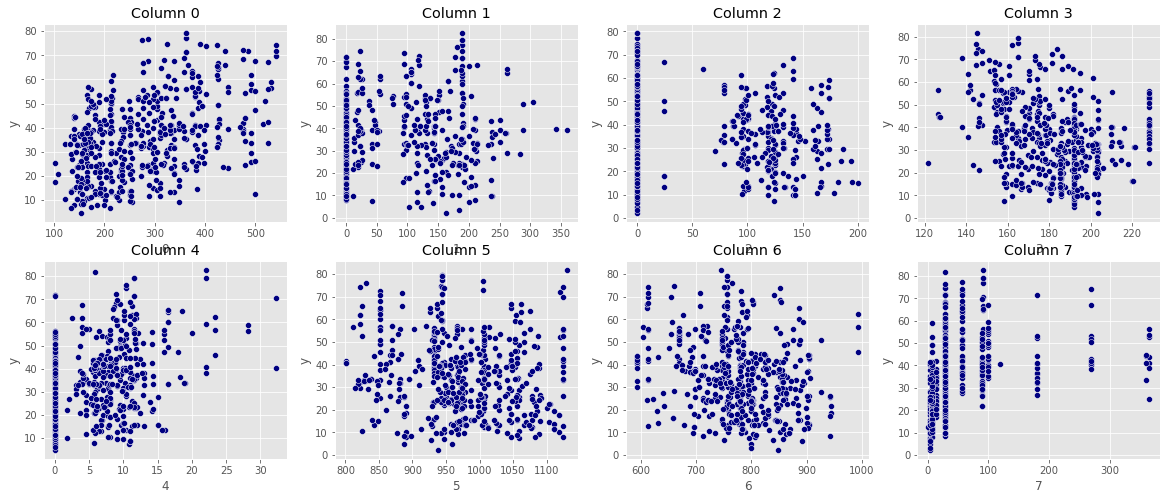

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data1']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 2

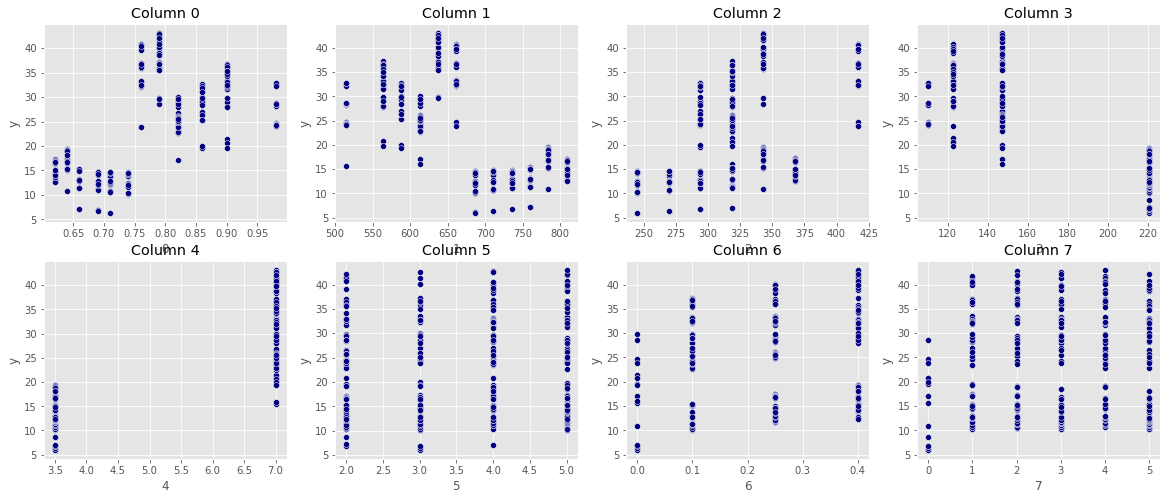

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data2']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 3

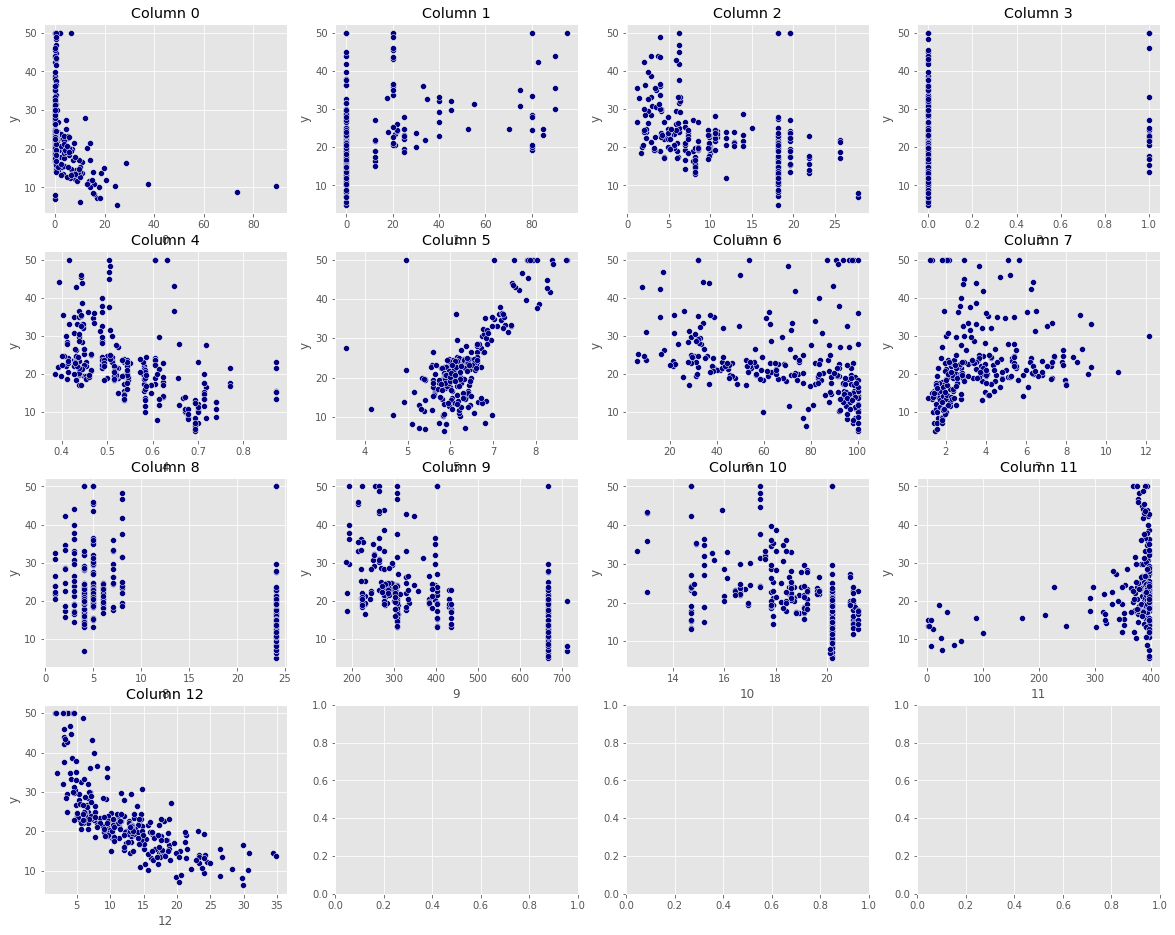

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_data['data3']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 4

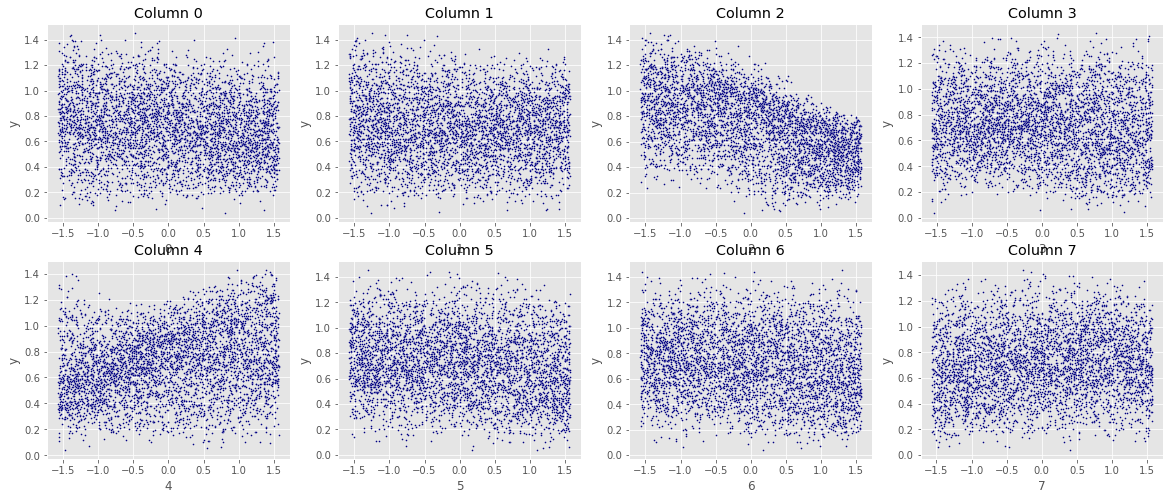

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data4']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy", s=3)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 5

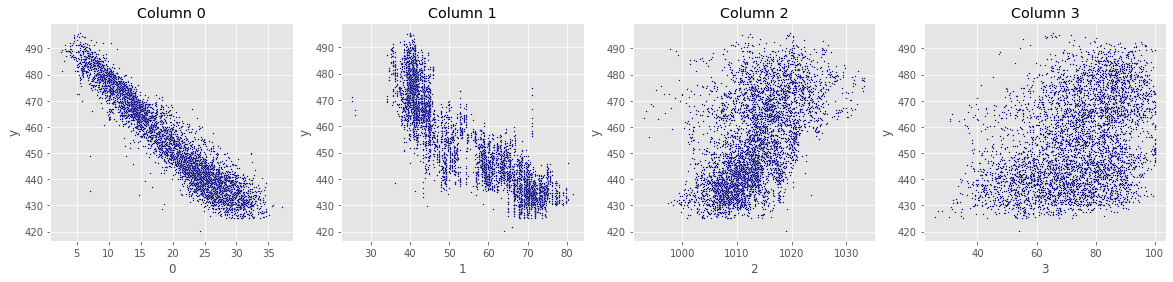

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
df = train_data['data5']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i%4], color="navy", s=2)
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 6

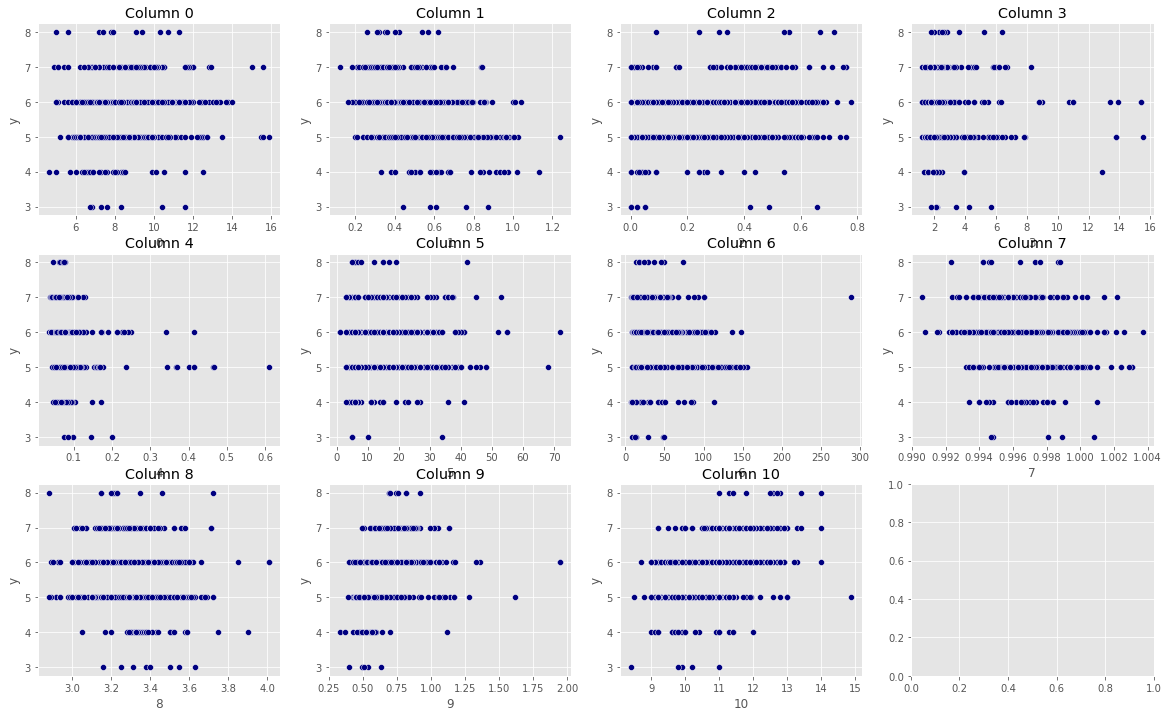

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data6']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

### Data 7

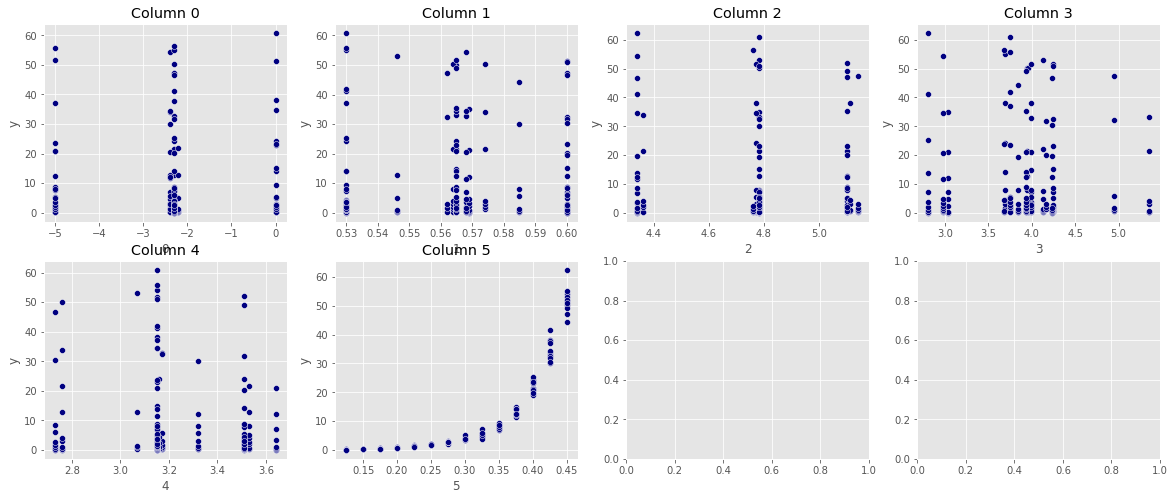

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data7']
for i in range(df.shape[1]-1):
    ax1 = sns.scatterplot(x=df.iloc[:, i], y=df.iloc[:, -1], ax=axes[i//4][i%4], color="navy")
    ax1.set_title("Column {}".format(i))
    ax1.set_ylabel("y")

## KDE & Hist plot
當變數的資料值取 unique 後數量小於 20 個，視為有序資料使用 histplot

### Data 1

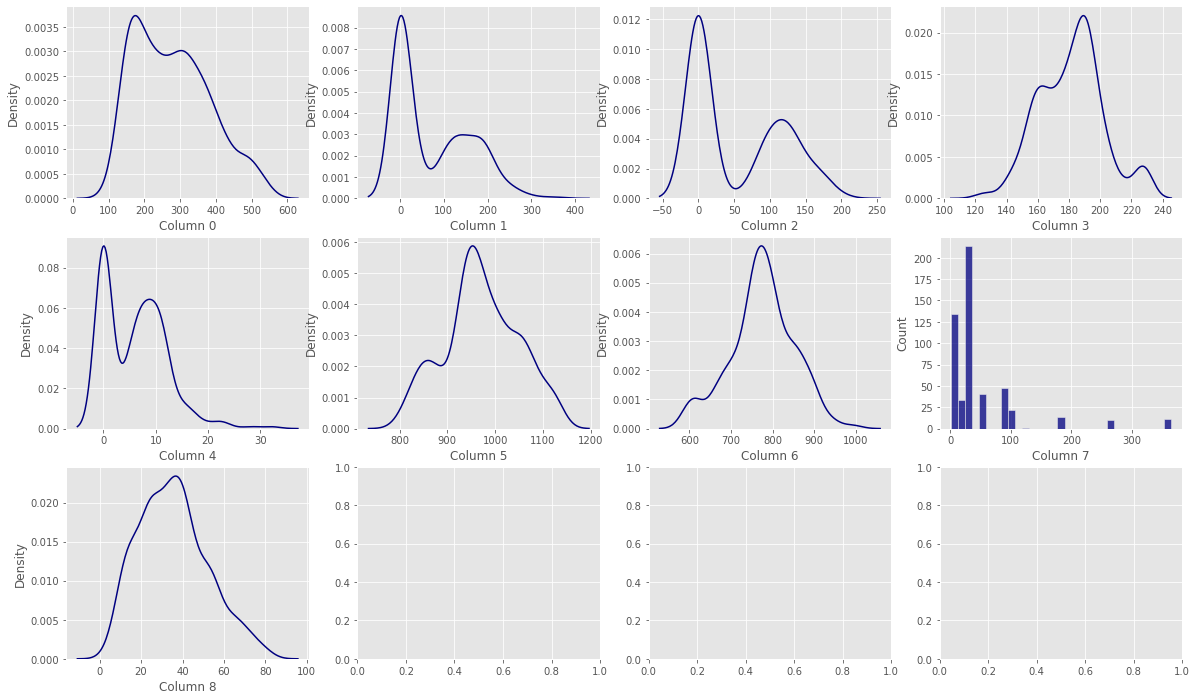

In [42]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data1']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 2

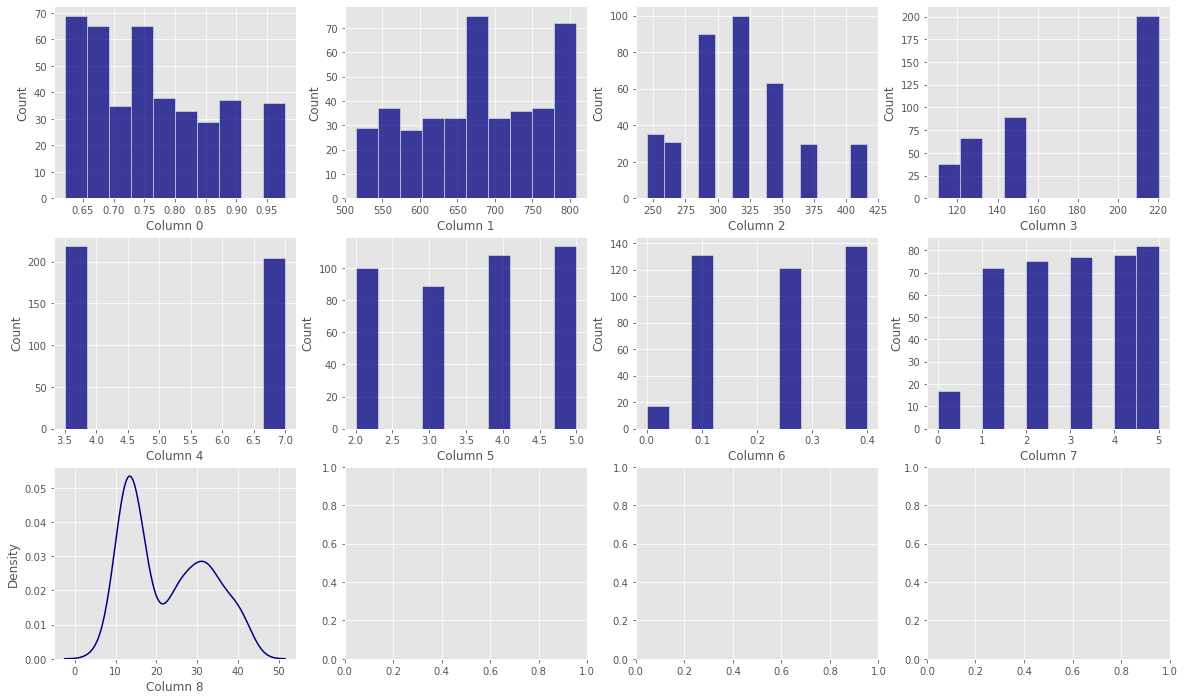

In [49]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data2']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 3

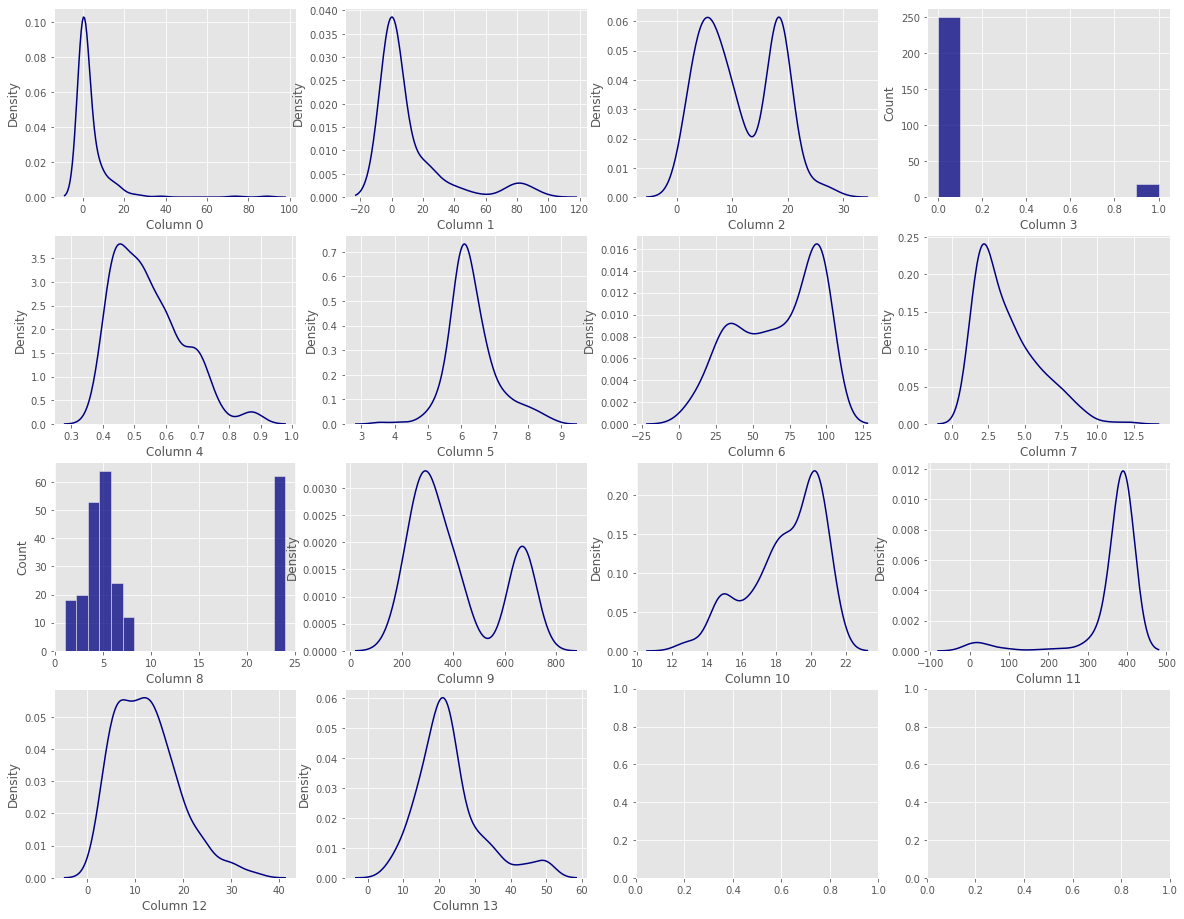

In [47]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
df = train_data['data3']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 4

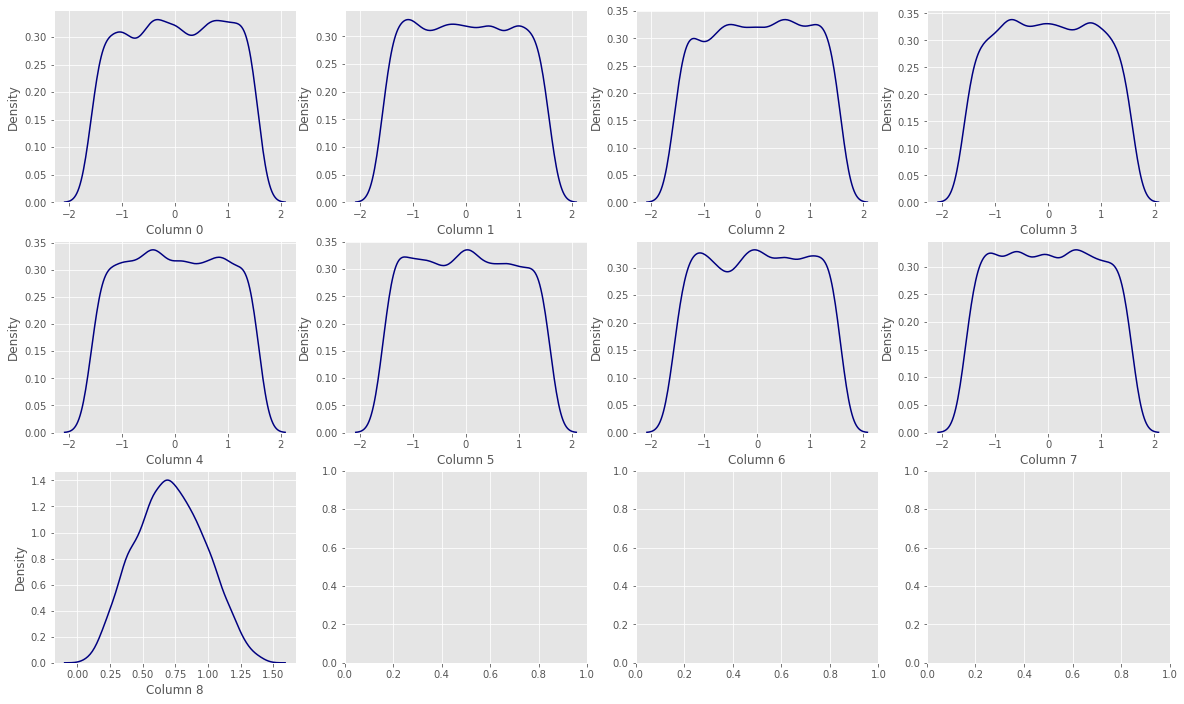

In [50]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data4']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 5

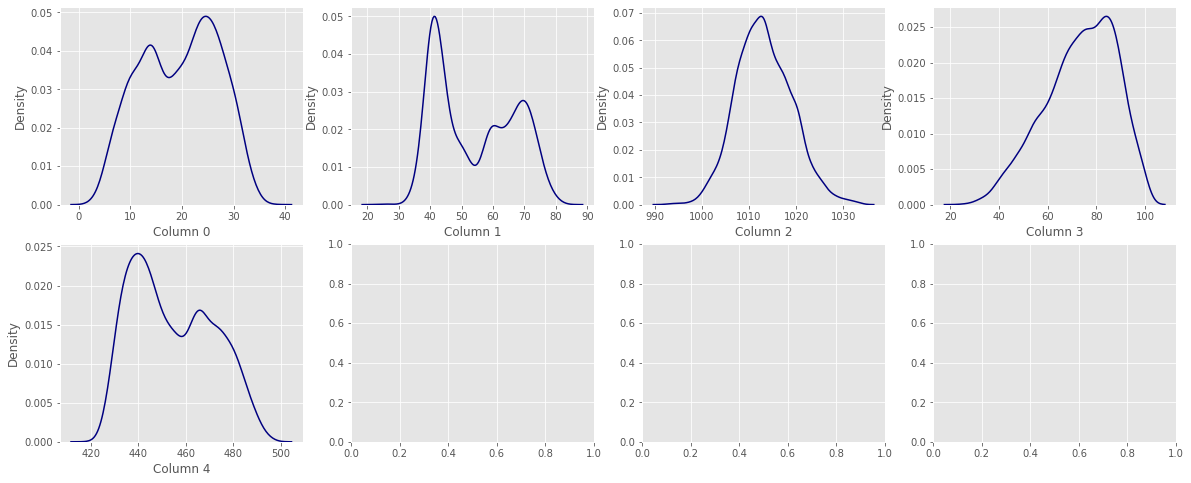

In [51]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data5']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 6

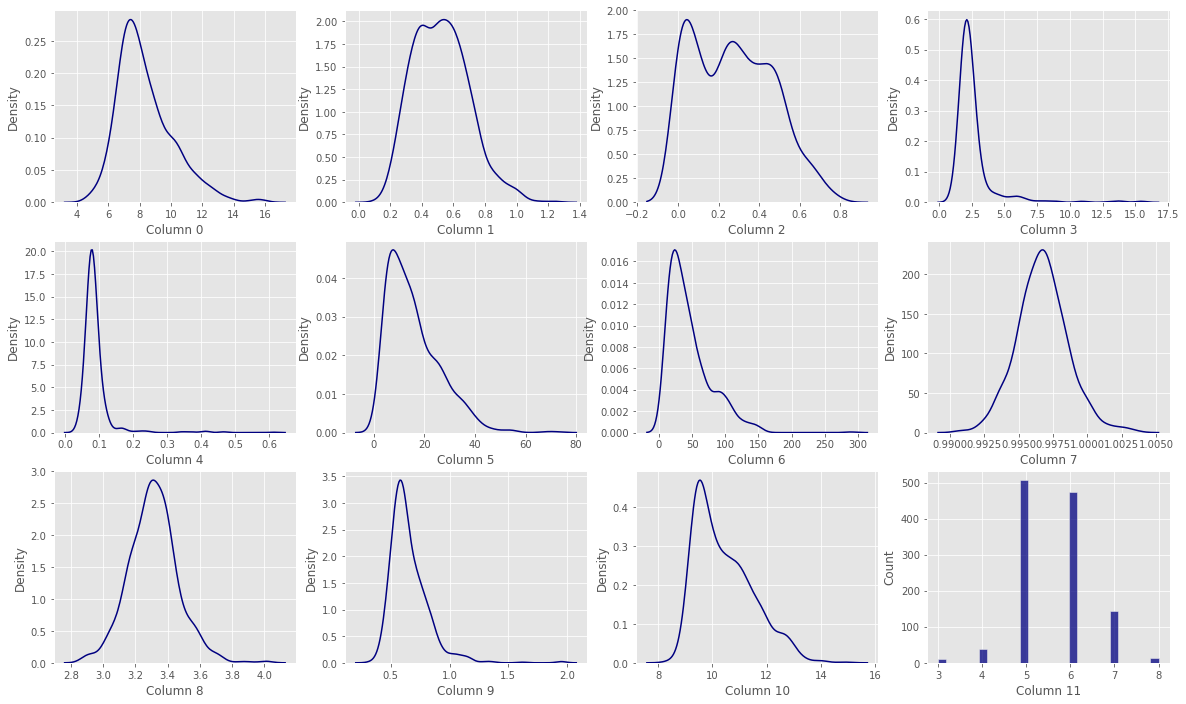

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 12))
df = train_data['data6']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

### Data 7

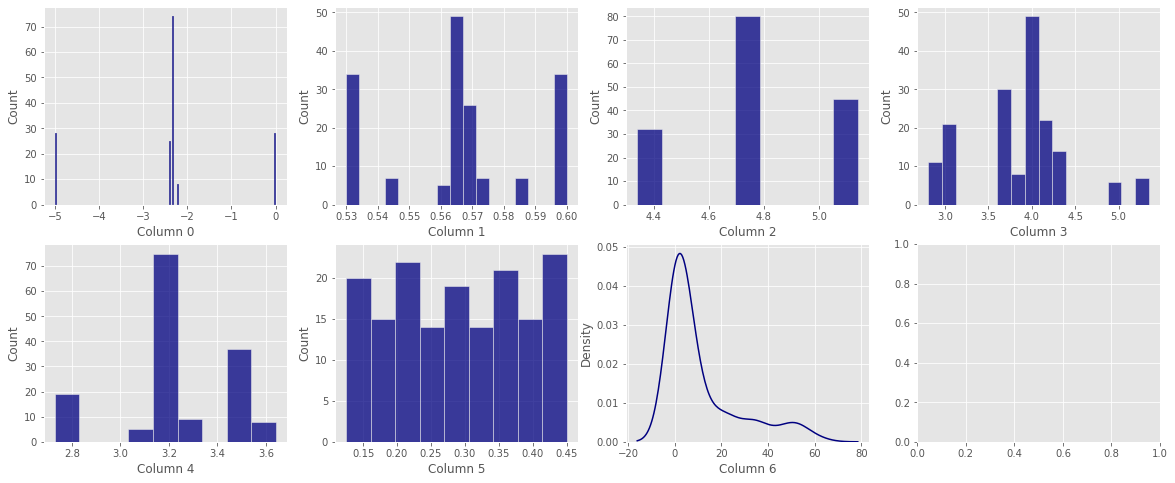

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
df = train_data['data7']
for i in range(df.shape[1]):
    if df.iloc[:, i].nunique() < 20:
        ax1 = sns.histplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    else:
        ax1 = sns.kdeplot(x=df.iloc[:, i], ax=axes[i//4][i%4], color="navy")
    ax1.set(xlabel="Column {}".format(i))

## Heat map

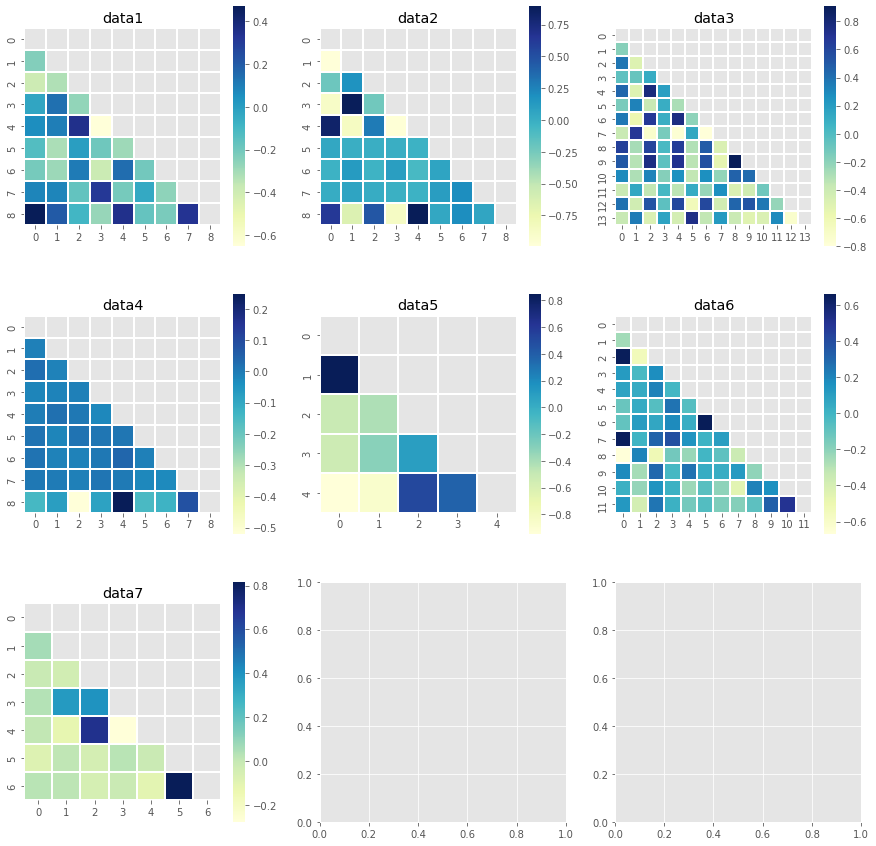

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
for i, data in enumerate(train_data):
    df = train_data[data]
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    ax1 = sns.heatmap(corr, xticklabels=corr.columns, mask=mask, yticklabels=corr.columns, 
                      square=True, linewidths=.2, cmap="YlGnBu", ax=axes[i//3][i%3])
    ax1.set_title("{}".format(data))

# Data Preprocessing 
- Check Missing Value
- 將缺少過多資料的 row 移除 (每個資料移除 10% 以下)
- 轉換 nunique < 20 做 Label Encoding

## Check Missing Value

### Exactly numbers

In [7]:
for data in train_data:
    df = train_data[data]
    count = []
    for col in df:
        count.append(df[col].isnull().sum())
    display(pd.DataFrame({data:count}).transpose())

,0,1,2,3,4,5,6,7,8
data1,234,220,218,225,219,239,249,237,0


,0,1,2,3,4,5,6,7,8
data2,167,161,195,179,151,163,167,173,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
data3,110,124,103,103,105,118,124,122,118,105,104,110,102,0


,0,1,2,3,4,5,6,7,8
data4,1755,1864,1834,1811,1764,1789,1850,1893,0


,0,1,2,3,4
data5,2132,2149,2089,2114,0


,0,1,2,3,4,5,6,7,8,9,10,11
data6,367,395,362,357,351,327,342,367,346,366,321,0


,0,1,2,3,4,5,6
data7,68,62,74,63,78,68,0


### 從欄位看，每行column的缺失值數量與比例
column name = 第幾欄位  
可以看到每個欄位接缺少約 3 成的資料

In [52]:
# Number of Missing Value
for data in train_data:
    df = train_data[data]
    count, percent = [], []
    for col in df:
        count.append(df[col].isnull().sum())
        percent.append( round(df[col].isnull().sum()/len(df[col])*100, 2) )
    display(pd.DataFrame({data:count, '%':percent}).transpose())

,0,1,2,3,4,5,6,7,8
data1,234.00,220.00,218.0,225.00,219.00,239.00,249.00,237.00,0.0
%,30.59,28.76,28.5,29.41,28.63,31.24,32.55,30.98,0.0


,0,1,2,3,4,5,6,7,8
data2,167.00,161.00,195.00,179.00,151.00,163.0,167.00,173.00,0.0
%,29.09,28.05,33.97,31.18,26.31,28.4,29.09,30.14,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
data3,110.00,124.00,103.00,103.00,105.0,118.00,124.00,122.00,118.00,105.0,104.00,110.00,102.00,0.0
%,29.65,33.42,27.76,27.76,28.3,31.81,33.42,32.88,31.81,28.3,28.03,29.65,27.49,0.0


,0,1,2,3,4,5,6,7,8
data4,1755.00,1864.00,1834.00,1811.00,1764.00,1789.0,1850.00,1893.00,0.0
%,28.94,30.74,30.24,29.86,29.09,29.5,30.51,31.22,0.0


,0,1,2,3,4
data5,2132.00,2149.00,2089.00,2114.00,0.0
%,30.13,30.37,29.52,29.87,0.0


,0,1,2,3,4,5,6,7,8,9,10,11
data6,367.00,395.00,362.0,357.00,351.00,327.00,342.00,367.00,346.00,366.00,321.00,0.0
%,30.92,33.28,30.5,30.08,29.57,27.55,28.81,30.92,29.15,30.83,27.04,0.0


,0,1,2,3,4,5,6
data7,68.00,62.00,74.00,63.00,78.00,68.00,0.0
%,29.44,26.84,32.03,27.27,33.77,29.44,0.0


### 從橫列看，每個 row 的缺失值數量
column name = 缺失值數量  
各資料集內皆有一些缺少過多數值的 row

In [53]:
# Number of Missing Value for each row
for data in train_data:
    df = train_data[data]
    count = [0 for _ in range(df.shape[1])]
    for row in range(df.shape[0]):
        target = df.iloc[row, :-1]
        missing_count = target.isnull().sum()
        count[missing_count] += 1  
        
    percent = [round(x/df.shape[0]*100, 2) for x in count]
    display(pd.DataFrame({data:count, '%':percent}).transpose())

,0,1,2,3,4,5,6,7,8
data1,48.00,152.00,216.00,189.00,120.00,31.00,8.00,1.00,0.0
%,6.27,19.87,28.24,24.71,15.69,4.05,1.05,0.13,0.0


,0,1,2,3,4,5,6,7,8
data2,38.00,106.00,187.00,139.00,69.00,27.0,8.00,0.0,0.0
%,6.62,18.47,32.58,24.22,12.02,4.7,1.39,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
data3,6.00,21.00,35.00,87.00,96.00,68.00,41.00,10.0,7.00,0.0,0.0,0.0,0.0,0.0
%,1.62,5.66,9.43,23.45,25.88,18.33,11.05,2.7,1.89,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8
data4,359.00,1180.00,1791.00,1565.00,822.00,277.00,61.00,8.00,1.00
%,5.92,19.46,29.53,25.81,13.56,4.57,1.01,0.13,0.02


,0,1,2,3,4
data5,1683.00,2960.00,1841.00,530.00,63.00
%,23.78,41.83,26.01,7.49,0.89


,0,1,2,3,4,5,6,7,8,9,10,11
data6,27.00,100.00,242.00,320.00,245.00,171.00,63.00,13.0,3.00,2.00,0.0,1.00
%,2.27,8.42,20.39,26.96,20.64,14.41,5.31,1.1,0.25,0.17,0.0,0.08


,0,1,2,3,4,5,6
data7,30.00,72.00,68.00,41.00,18.00,2.00,0.0
%,12.99,31.17,29.44,17.75,7.79,0.87,0.0


### msno

* Here is data1.


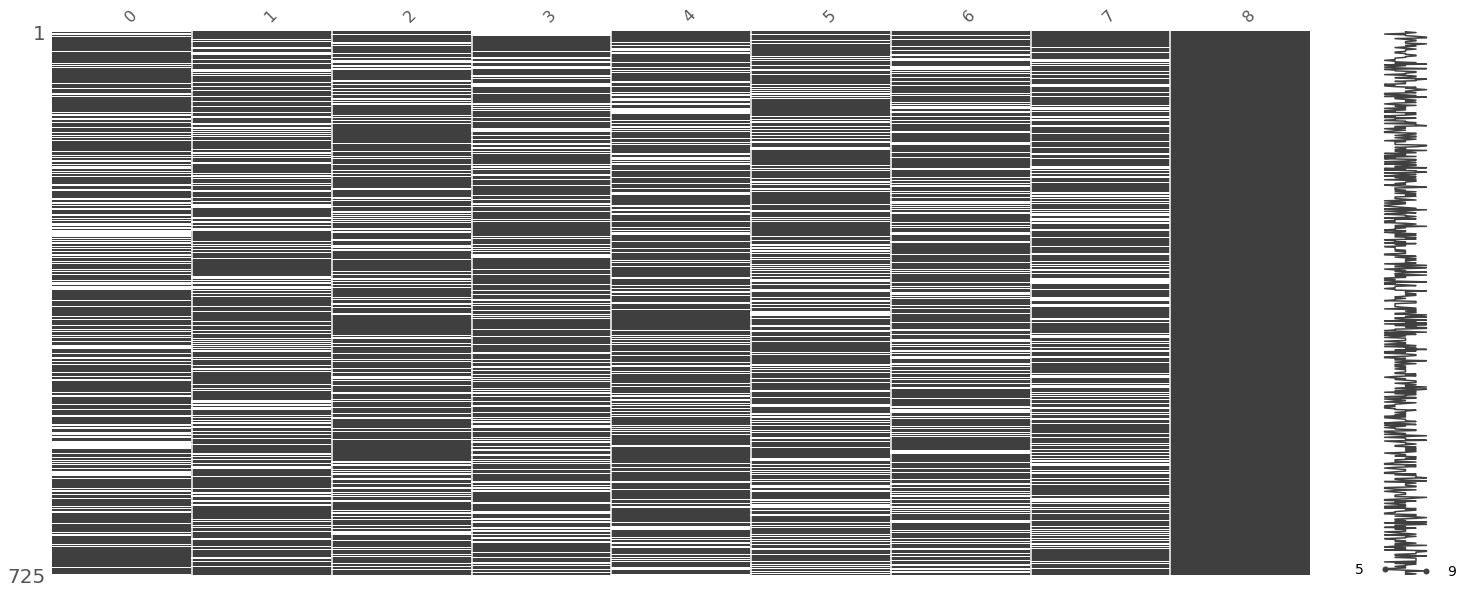

* Here is data2.


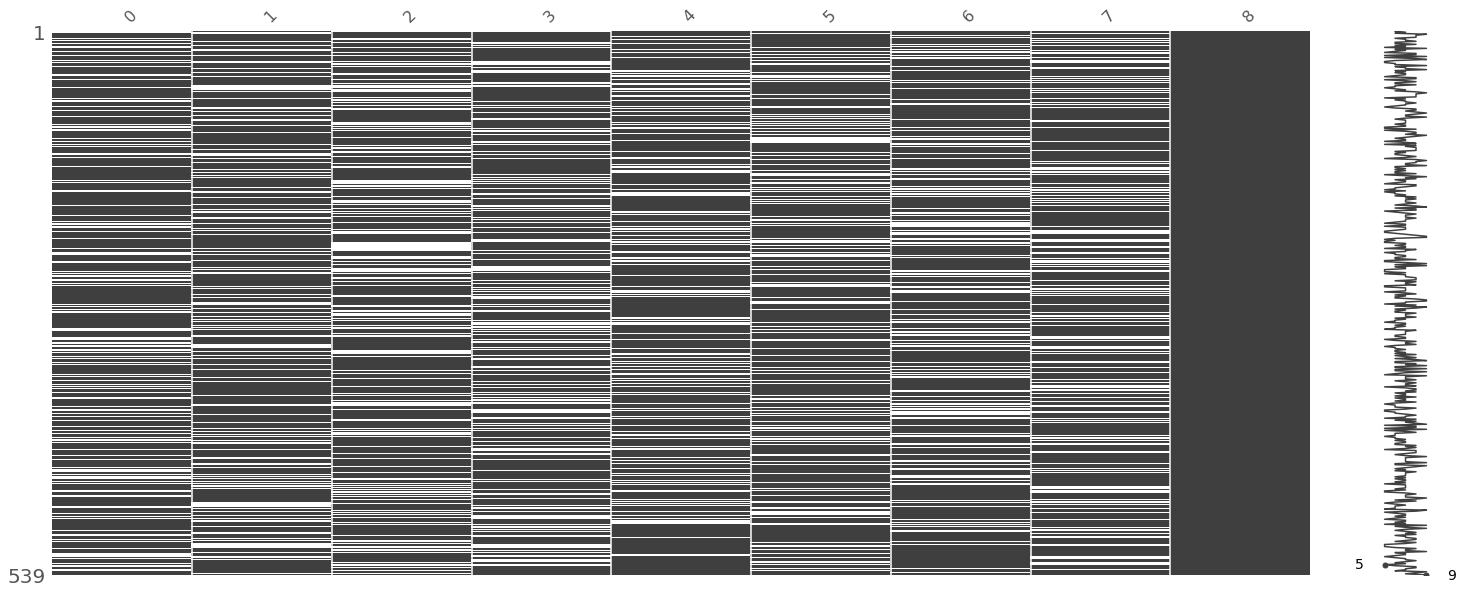

* Here is data3.


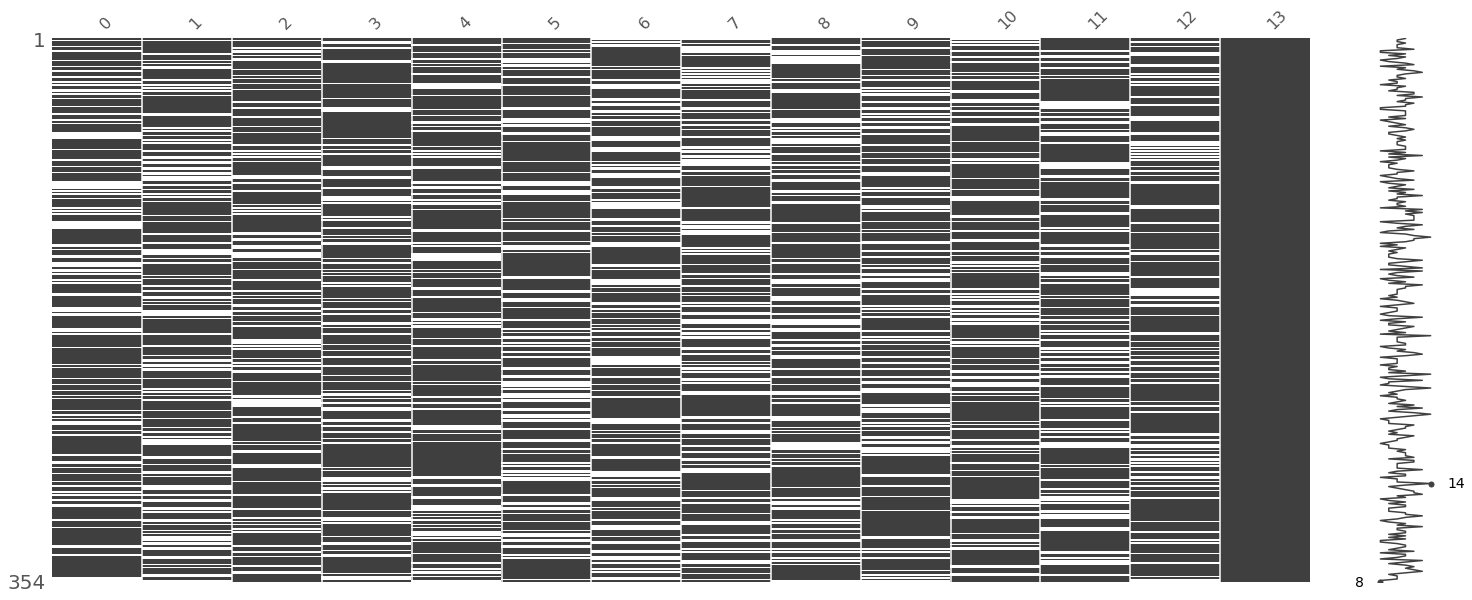

* Here is data4.


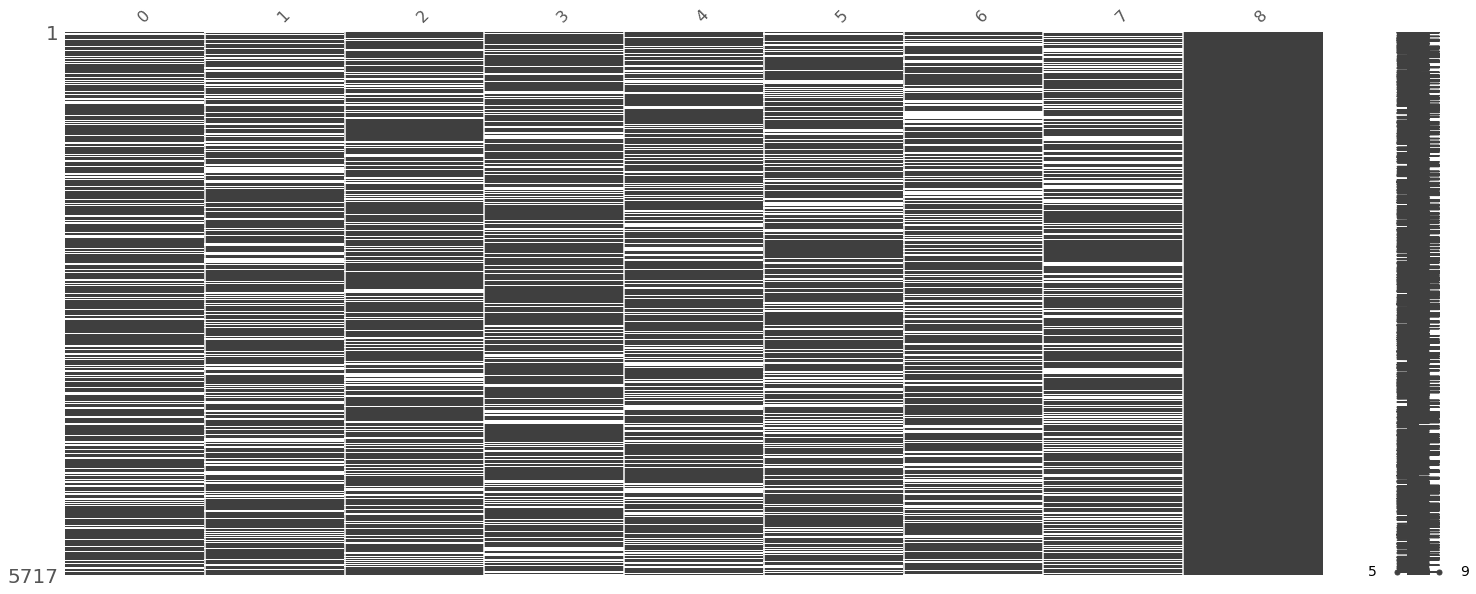

* Here is data5.


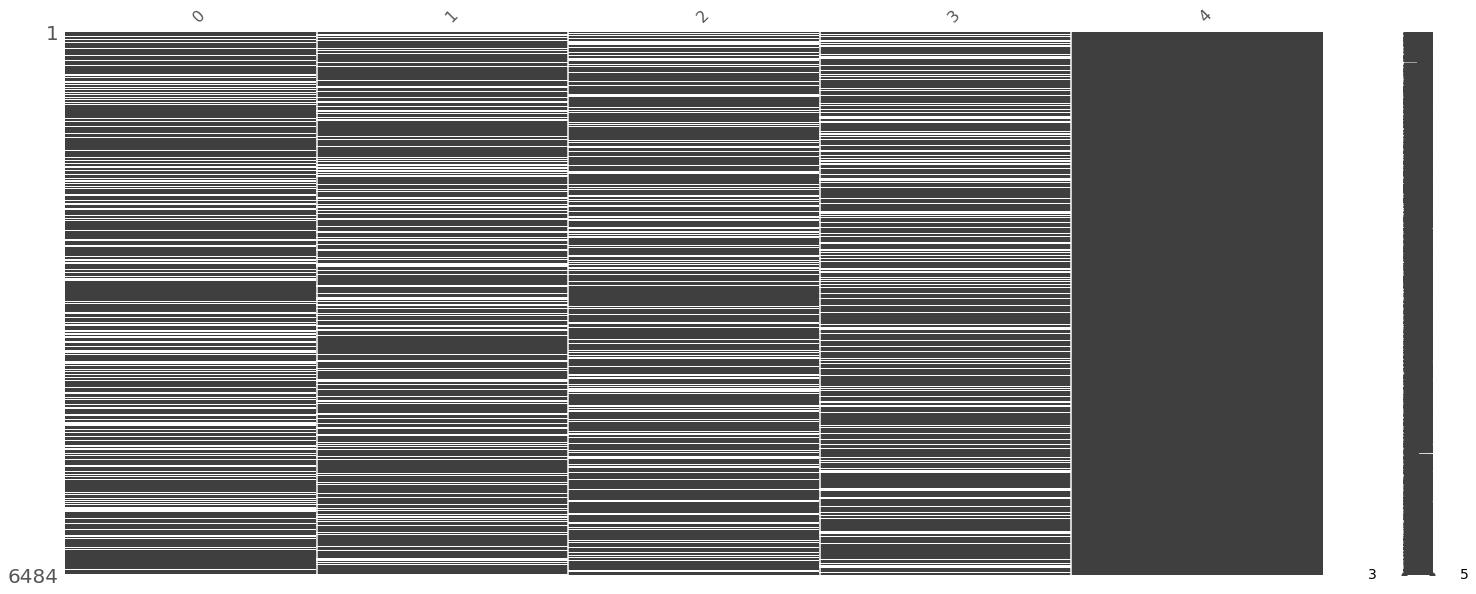

* Here is data6.


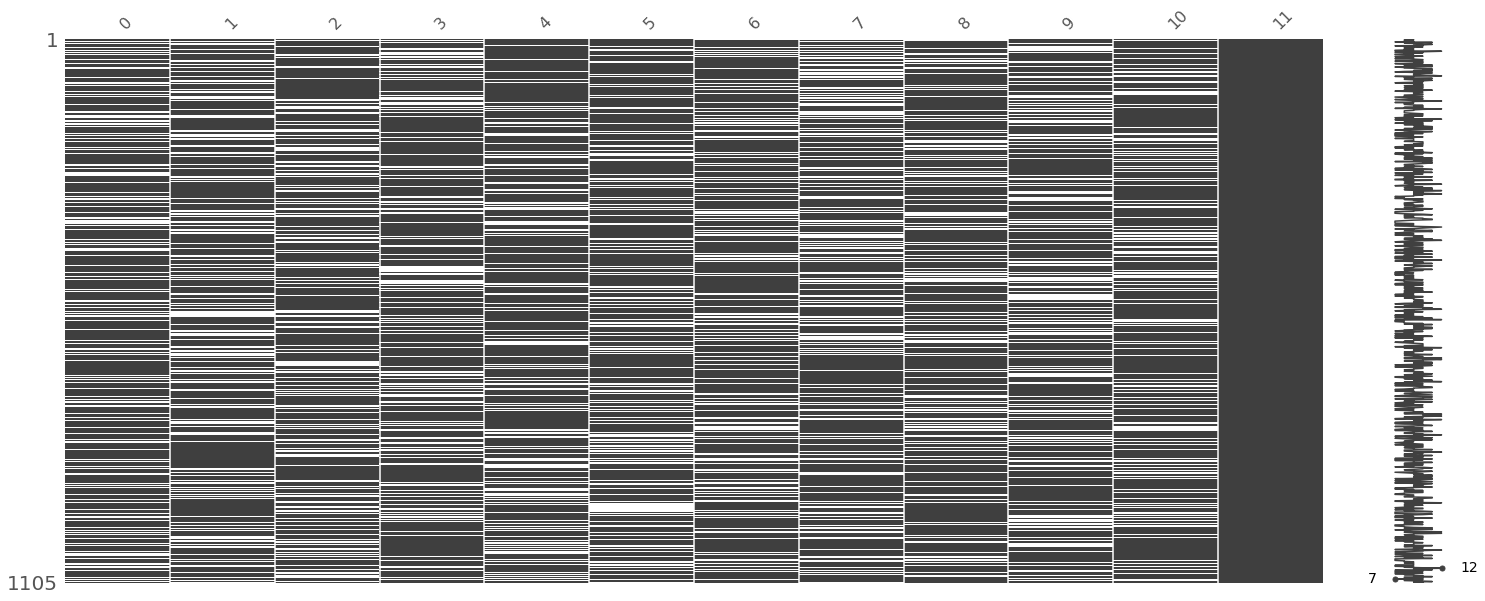

* Here is data7.


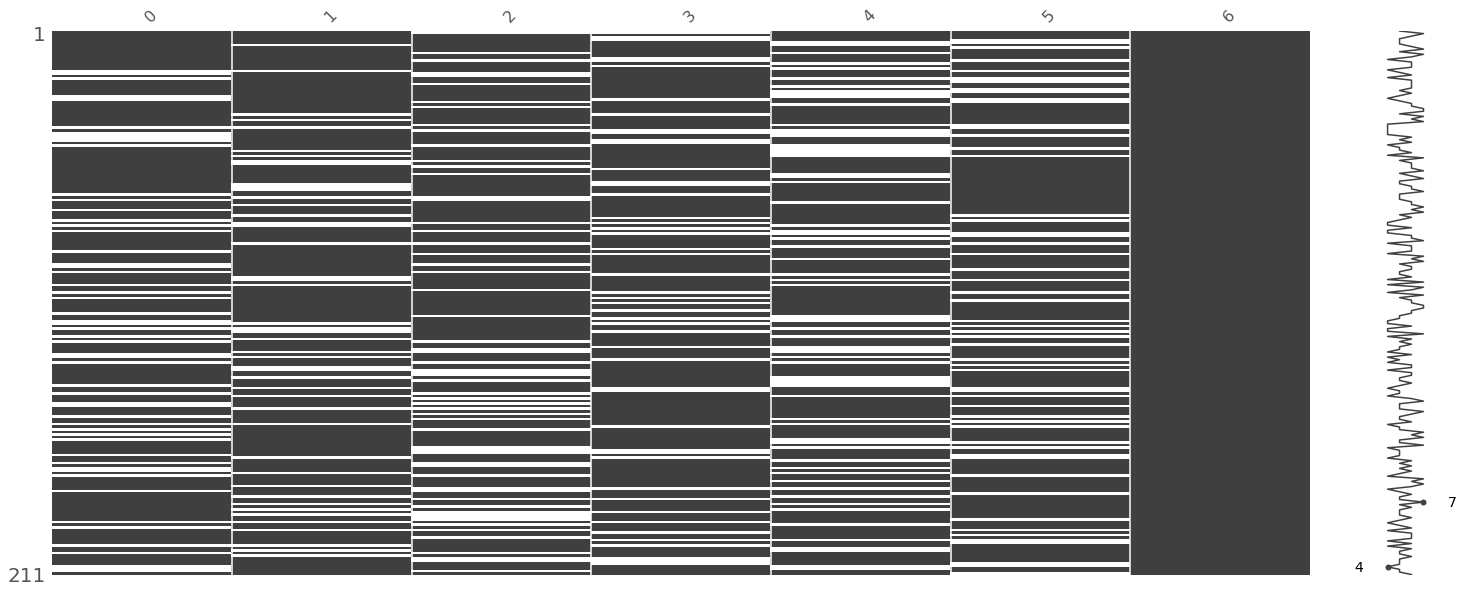

In [65]:
import missingno as msno
for i in range(1, 8):
    print("* Here is data{}.".format(i))
    msno.matrix(train_data["data{}".format(i)])
    plt.show()

## 將缺少過多資料的 row 移除 (每個資料移除 10% 以下)

In [55]:
for data in train_data:
    df = train_data[data]
    # 計算每 row 的缺少值
    count = [0 for _ in range(df.shape[1])] 
    for row in range(df.shape[0]):
        missing_count = df.iloc[row, :-1].isnull().sum()
        count[missing_count] += 1  
        
    percent = [round(x/df.shape[0]*100, 2) for x in count]
    #display(pd.DataFrame({data:count, '%':percent}).transpose())
    percent_cum = np.cumsum(percent[::-1])[::-1] # reverse the list and do cumulation
    
    # remove task
    for num in range(df.shape[0]):
        if percent_cum[num] < 11: # 移除小於 11% 資料比例，決定移除缺少超過 `num` 個的 row
            for row in range(df.shape[0]):
                missing_count = df.iloc[row, :-1].isnull().sum()
                if missing_count >= num:
                    train_data[data] = train_data[data].drop(df.index[[row]])
            train_data[data] = train_data[data].reset_index(drop=True)
            break

In [56]:
# 移除後的資料 shape
for data in train_data:
    df = train_data[data]
    print(data, ':', df.shape)

data1 : (725, 9)
data2 : (539, 9)
data3 : (354, 14)
data4 : (5717, 9)
data5 : (6484, 5)
data6 : (1105, 12)
data7 : (211, 7)


## 轉換 nunique < 20 做 Label Encoding

轉換 Encoding 前，先查看測試集的資料是否皆有包含在訓練集內   
從下方可知道做label轉換不會有問題

In [61]:
for data in train_data:
    print(data)
    df_train = train_data[data]
    df_test = test_data[data]
    unique_item = []
    for col in range(df_train.shape[1]-1):
        values_train = df_train.iloc[:, col].unique()
        values_train = set(sorted(values_train[~np.isnan(values_train)]))
        
        values_test = df_test.iloc[:, col].unique()
        values_test = set(sorted(values_test[~np.isnan(values_test)]))
        
        # 檢測是否為所有 test data 值都有在 train data 裡面
        if len(values_train) < 20:
            if values_test.issubset(values_train):
                print('Column {} Contains all test values'.format(col))
            else:
                print('Continuous. Column {} left data: {}'.format(col, values_train))
    print()

data1
Column 7 Contains all test values

data2
Column 0 Contains all test values
Column 1 Contains all test values
Column 2 Contains all test values
Column 3 Contains all test values
Column 4 Contains all test values
Column 5 Contains all test values
Column 6 Contains all test values
Column 7 Contains all test values

data3
Column 3 Contains all test values
Column 8 Contains all test values

data4

data5

data6

data7
Column 0 Contains all test values
Column 1 Contains all test values
Column 2 Contains all test values
Column 3 Contains all test values
Column 4 Contains all test values
Column 5 Contains all test values



In [57]:
label_col, non_label_col = {}, {}  # 紀錄轉為標記 / 非標記的欄位
label_dict = {}  # 紀錄轉換 Label 前後的值

for data in train_data:
    print(data)
    df = train_data[data].copy()
    unique_num = df.nunique()
    label_col[data], non_label_col[data] = [], []  # 建立目前 data 的空清單
    label_dict[data] = {}  # 建立目前 data Label 的空字典
    
    for col in range(df.shape[1]):
        unique_item = df.iloc[:, col].unique()
        unique_item = sorted(unique_item[~np.isnan(unique_item)]) # 排序並移除 nan
        
        # 將少於 20 個值的欄位視為有序變數，並轉換 Label
        if unique_num[col] < 20:
            label_col[data].append(col) # 登入標記欄位
            label_dict[data]['col{}'.format(col)] = {}  # 建立目前 欄位 的空字典
            
            for j in range(unique_num[col]):
                to_replace = np.where(df.iloc[:, col]==unique_item[j])[0]
                train_data[data].loc[to_replace, col] = j
                # 登入此 unique_item 轉換為 j 標記
                label_dict[data]['col{}'.format(col)][unique_item[j]] = j  
        
        elif col != (df.shape[1]):
            non_label_col[data].append(col) # 登入非標記欄位

data1
data2
data3
data4
data5
data6
data7


In [58]:
# 七個資料集，各自登記使用 Label Encoding 欄位
label_col

{'data1': [7],
 'data2': [0, 1, 2, 3, 4, 5, 6, 7],
 'data3': [3, 8],
 'data4': [],
 'data5': [],
 'data6': [11],
 'data7': [0, 1, 2, 3, 4, 5]}

In [66]:
# 七個資料集，各自登記 "不" 使用 Label Encoding 欄位
non_label_col

{'data1': [0, 1, 2, 3, 4, 5, 6, 8],
 'data2': [8],
 'data3': [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13],
 'data4': [0, 1, 2, 3, 4, 5, 6, 7, 8],
 'data5': [0, 1, 2, 3, 4],
 'data6': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'data7': [6]}

In [60]:
# 查看轉換過後的資料值狀態
for data in train_data:
    df = train_data[data]
    unique_item = []
    for col in range(df.shape[1]):
        values = df.iloc[:, col].unique()
        values = sorted(values[~np.isnan(values)])
        if len(values) < 20:
            unique_item.append(values)
        else:
            unique_item.append('Continuous')
    display(pd.DataFrame({'unique num':df.nunique(), 
                          'feature type':df.dtypes,
                          'values':unique_item}))

,unique num,feature type,values
0,215,float64,Continuous
1,136,float64,Continuous
2,101,float64,Continuous
3,151,float64,Continuous
4,89,float64,Continuous
5,204,float64,Continuous
6,222,float64,Continuous
7,14,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
8,616,float64,Continuous


,unique num,feature type,values
0,12,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
1,12,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
2,7,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]"
3,4,float64,"[0.0, 1.0, 2.0, 3.0]"
4,2,float64,"[0.0, 1.0]"
5,4,float64,"[0.0, 1.0, 2.0, 3.0]"
6,4,float64,"[0.0, 1.0, 2.0, 3.0]"
7,6,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
8,435,float64,Continuous


,unique num,feature type,values
0,251,float64,Continuous
1,23,float64,Continuous
2,62,float64,Continuous
3,2,float64,"[0.0, 1.0]"
4,74,float64,Continuous
5,235,float64,Continuous
6,197,float64,Continuous
7,220,float64,Continuous
8,9,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]"
9,51,float64,Continuous


,unique num,feature type,values
0,3895,float64,Continuous
1,3866,float64,Continuous
2,3867,float64,Continuous
3,3873,float64,Continuous
4,3896,float64,Continuous
5,3896,float64,Continuous
6,3856,float64,Continuous
7,3794,float64,Continuous
8,4338,float64,Continuous


,unique num,feature type,values
0,2287,float64,Continuous
1,610,float64,Continuous
2,2034,float64,Continuous
3,3185,float64,Continuous
4,3994,float64,Continuous


,unique num,feature type,values
0,90,float64,Continuous
1,127,float64,Continuous
2,78,float64,Continuous
3,75,float64,Continuous
4,121,float64,Continuous
5,51,float64,Continuous
6,130,float64,Continuous
7,96,float64,Continuous
8,82,float64,Continuous
9,79,float64,Continuous


,unique num,feature type,values
0,5,float64,"[0.0, 1.0, 2.0, 3.0, 4.0]"
1,10,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
2,8,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]"
3,17,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,10,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
5,14,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
6,188,float64,Continuous


In [59]:
# 為 test data 做 Label Encoding 轉換
for data in test_data:
    print(data)
    df = test_data[data].copy()

    for col in label_col[data]:
        label_transfer_list = label_dict[data]['col{}'.format(col)]
        test_data[data].iloc[:, col] = df.iloc[:, col].replace(label_transfer_list)

data1
data2
data3
data4
data5
data6
data7
